# SciPy (the Scientific Python Library)

Summary of what we have learned so far:

1) `numpy` supplies many common statistics and math functions for operating on arrays.
2) `netCDF4` and `pandas` allow you to read in multidimensional and labeled data.
3) `matplotlib` generates many standard plot types (line plots, scatter, images, contours, histograms)

 What about more complex operations such as filtering? How do people generate such _fancy_ statistics plots? 

[SciPy](https://scipy.org/) is an all-purpose scientific Python library that operates on NumPy arrays where you will find the following (and much more!):

1) [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html): convolution, filtering, peak finding, spectral analysis

2) [scipy.fft](https://docs.scipy.org/doc/scipy/reference/fft.html): fft, ifft, fftshift, sin and cos transforms

3) [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html): curve fitting, root finding, nonlinear least squares, minimization

4) [scipy.linalg](https://docs.scipy.org/doc/scipy/reference/linalg.html): matrix functions, decompositions, inv, eig

5) [scipy.interpolate](https://docs.scipy.org/doc/scipy/reference/interpolate.html): univariate and multivariate interpolation, cubic splines, smoothing and approximation

6) [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html): single/double/triple definite integrals, integrating over fixed samples, numerical methods (Runge-Kutta, Initial Value problems)

7) [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html): continuous distributions, discrete distributions, multivariate distributions, summary stats, frequency stats, correlation and association, resampling and Monte Carlo methods

You can consider SciPy tools to be roughly equivalent to tools you would find in Matlab or R. SciPy is also heavily tested, has millions of users, and regular maintainers.

### Filtering

In [1]:
from scipy.signal import butter, sosfiltfilt, detrend
import numpy as np

### Curve Fitting

In [2]:
from scipy.optimize import curve_fit
import numpy as np

# curve fitting
def model_function(x, a, b):
    return a * np.exp(b * x)
x_data = np.array([0, 1, 2, 3])
y_data = np.array([1, 2.7, 7.4, 20.1])
params, covariance = curve_fit(model_function, x_data, y_data)
print(f"Fitted parameters: a={params[0]:.2f}, b={params[1]:.2f}")

Fitted parameters: a=1.00, b=1.00


### Linear Algebra

In [3]:
from scipy import linalg

# determinant of a matrix 
matrix = np.array([[1, 2], [3, 4]])
determinant = linalg.det(matrix)
print(f"Determinant: {determinant}")

Determinant: -2.0


### Stats

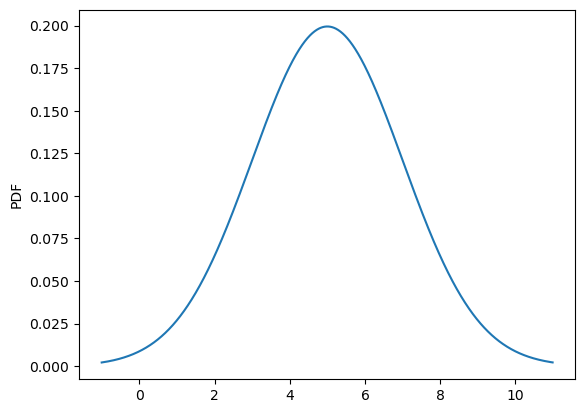

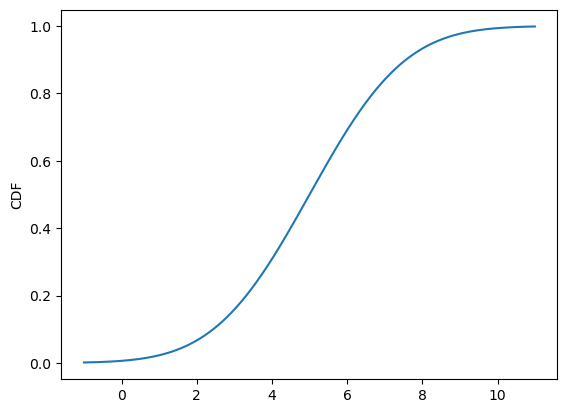

4.937784281211061 1.9875958473520143


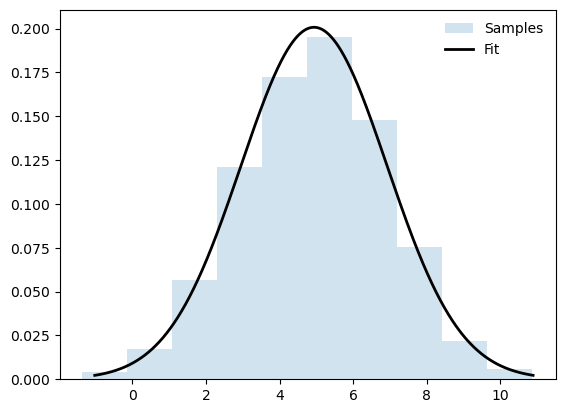

In [6]:
# examples adapted from https://xiaoganghe.github.io/python-climate-visuals/chapters/data-analytics/scipy-basic.html

from scipy import stats
import matplotlib.pyplot as plt

bins = np.arange(5 - 3 * 2, 5 + 3 * 2, 0.01)

PDF = stats.norm.pdf(bins, loc=5, scale=2)  # generate PDF in bins
CDF = stats.norm.cdf(bins, loc=5, scale=2)  # generate CDF in bins
SF = stats.norm.sf(bins, loc=5, scale=2)  # generate survival function (1-CDF)
PPF = stats.norm.ppf(0.5, loc=5, scale=2)  # obtain percent point (inverse of CDF)
RVS = stats.norm.rvs(loc=5, scale=2, size=1000)  # generate 1000 random variates
MMS = stats.norm.stats(loc=5, scale=2, moments='mvsk')  # obtain the four moments

plt.plot(bins, PDF)
plt.ylabel("PDF")
plt.show()

plt.plot(bins, CDF)
plt.ylabel("CDF")
plt.show()

# fit a dataset into a distribution
samples = stats.norm.rvs(loc=5, scale=2, size=1000)  # pesudo dataset
mu, sigma = stats.norm.fit(samples, method="MLE")  # do a maximum-likelihood fit
print(mu, sigma)

# Plot figure
bins = np.arange(mu - 3 * sigma, mu + 3 * sigma, 0.01)
plt.hist(samples, density=True, histtype='stepfilled',
         alpha=0.2, label='Samples')
plt.plot(bins, stats.norm.pdf(bins, loc=mu, scale=sigma),
         'k-', lw=2, label='Fit')
plt.legend(loc='best', frameon=False)
plt.show()

In [7]:
# T-test and p value for statistical significance 
a = np.random.normal(0, 1, size=100)  # Sample A
b = np.random.normal(1, 1, size=10)   # Sample B
T, p = stats.ttest_ind(a, b)          # T-test
print(T, p)

-2.8614204830777963 0.005065297984663446
